In [1]:
%matplotlib inline
from IPython.display import Image
# make sure the notebook kernel is built in a psana-py2 environment
from src.average_synthetic_datasets import *

# Exploration of the effect of the virus inner density on the data simulated by `skopi`
6 datasets, each of 200,000 images were generated with `skopi` where the inner density was varied from zero to twice a typical protein density. We show below central slices of the "exact" wave scatter by the virus in each case.

In [3]:
FIGURE_DIR="/cds/home/f/fpoitevi/Toolkit/skopi/examples/notebooks/figures/pr772/"
SKOPI_DATASETS_DIR="/reg/data/ana03/scratch/fpoitevi/skopi/6q5u/"
density_list = ['0.', '0.15', '0.3', '0.325', '0.35', '0.375', '0.4', '0.425', '0.45', '0.6', '0.75']

In [4]:
toto = h5.File(SKOPI_DATASETS_DIR+"0./saveHDF5_parallel.h5", 'r')
toto.keys()

[u'intensities',
 u'orientations',
 u'photons',
 u'pixel_index_map',
 u'pixel_position_reciprocal',
 u'positions',
 u'volume']

Absolute value of the wavefunction scattered by the virus for increasing values of electron density in its core


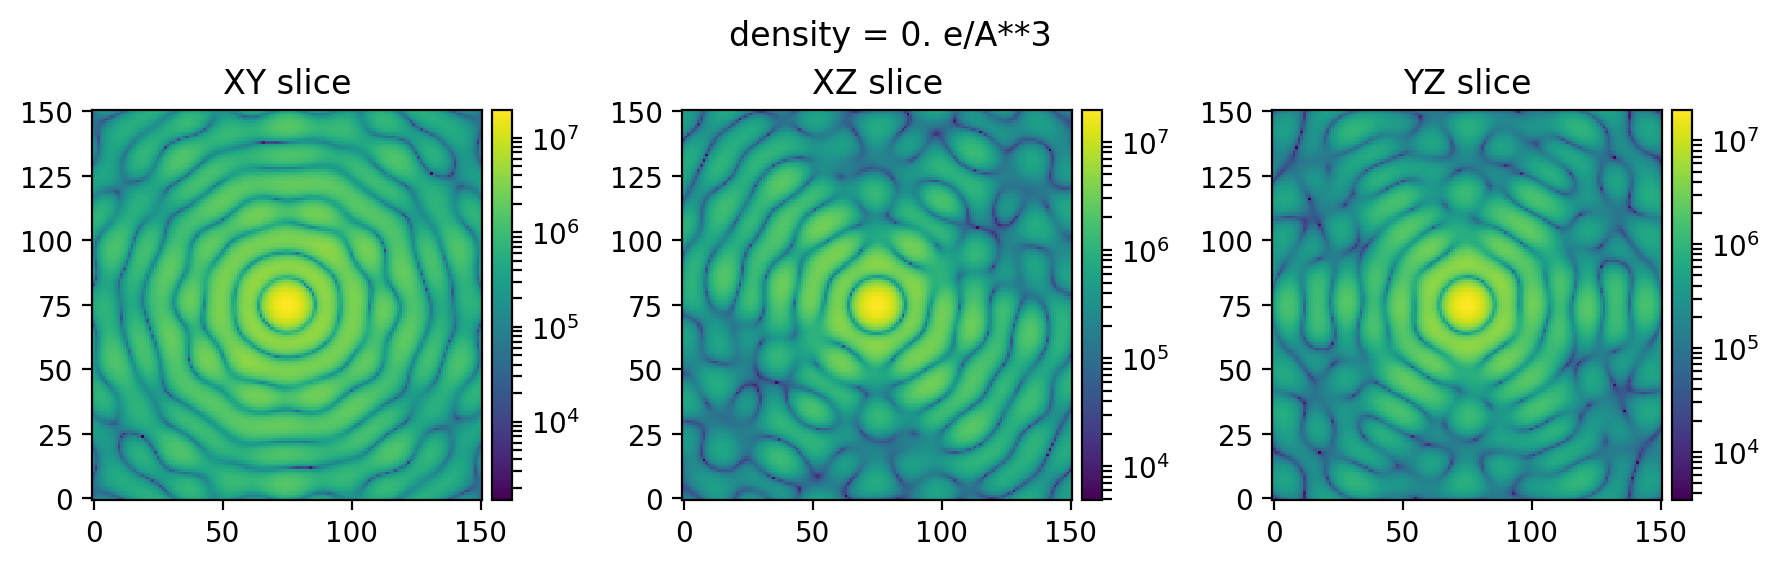

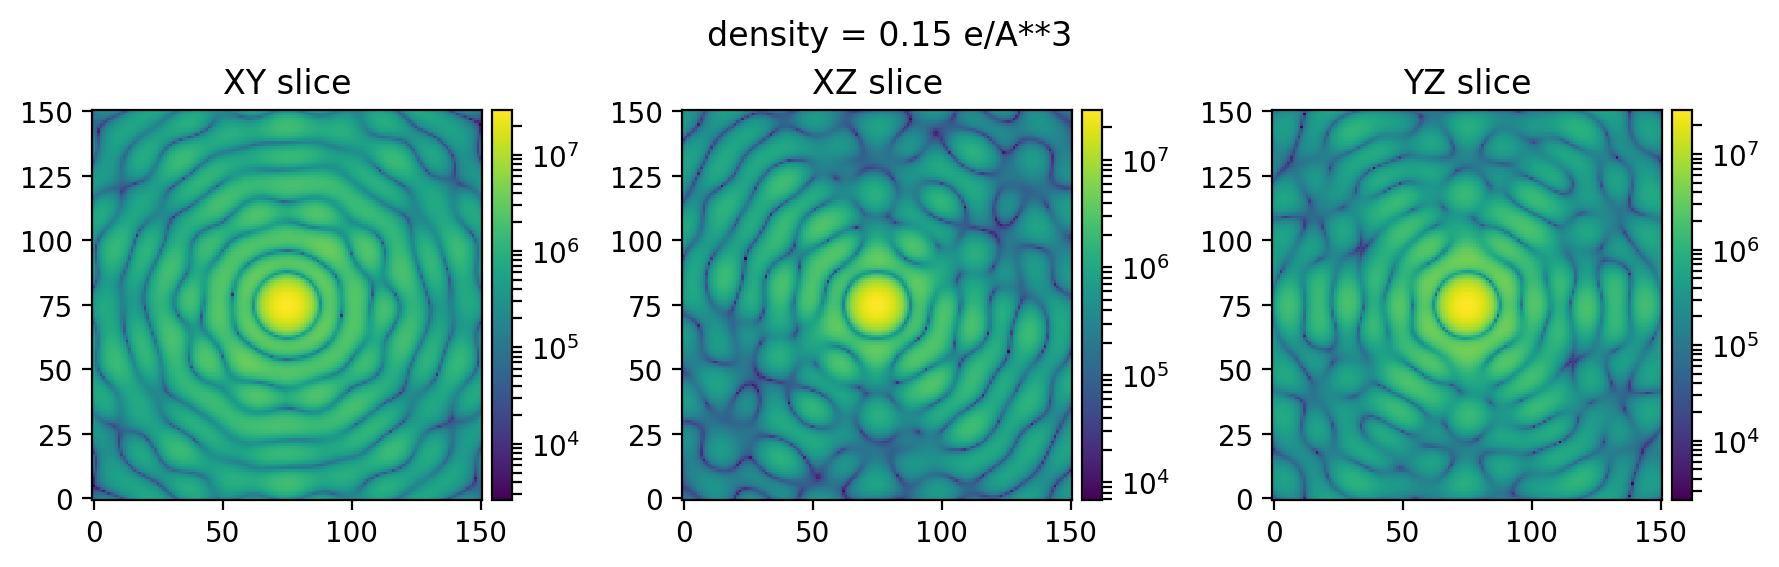

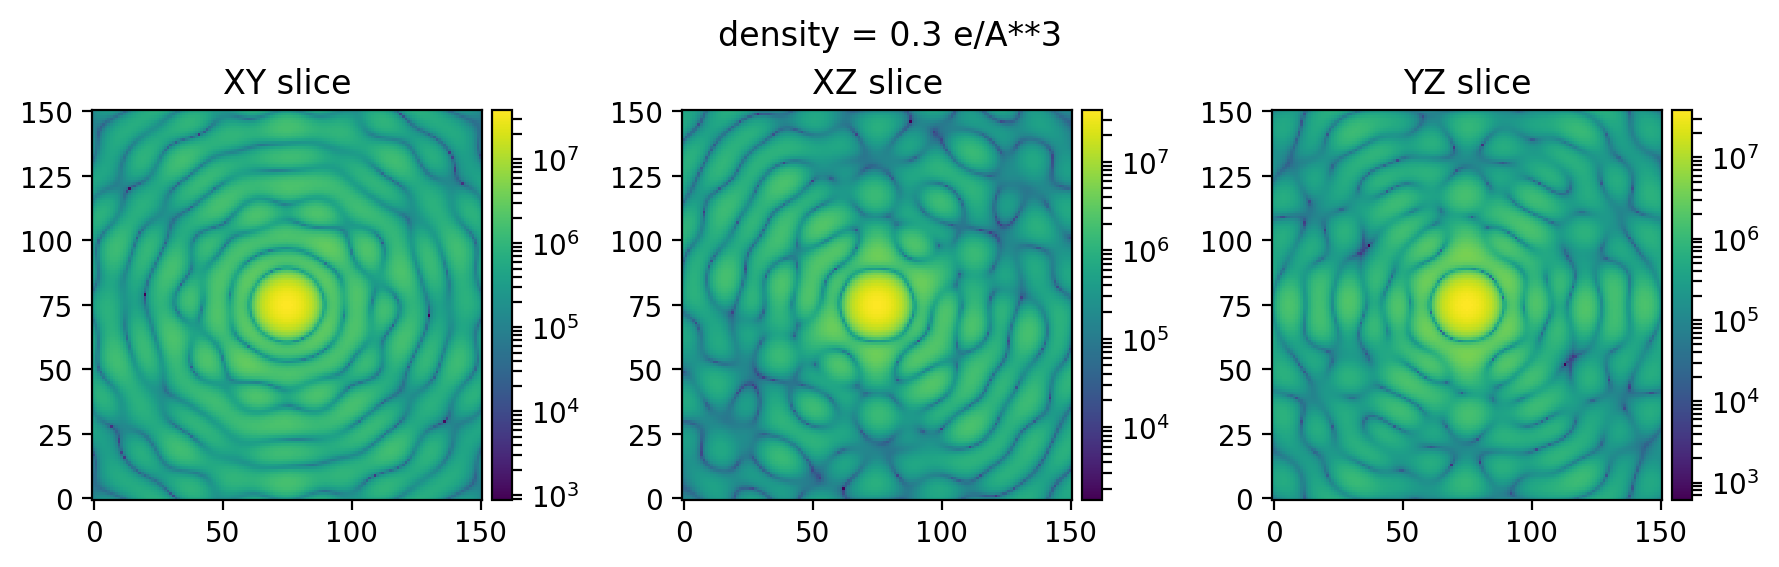

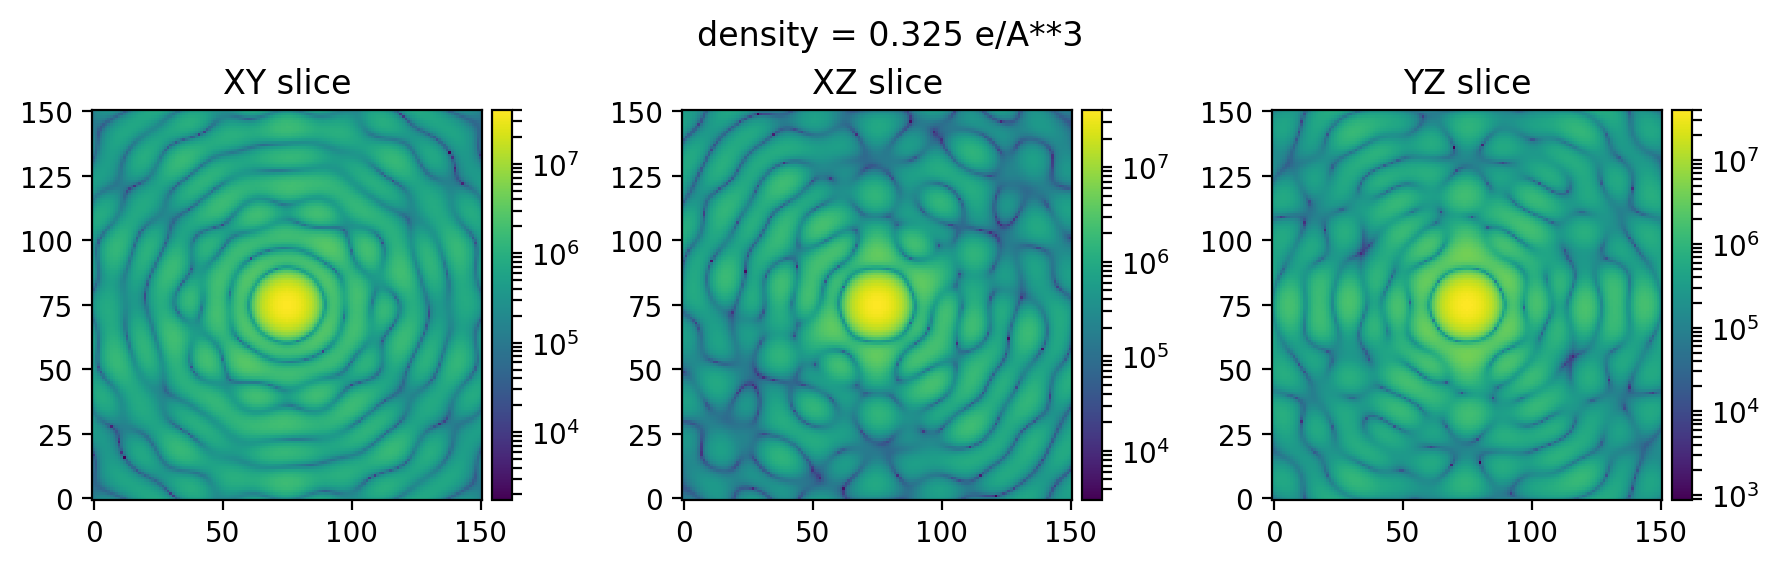

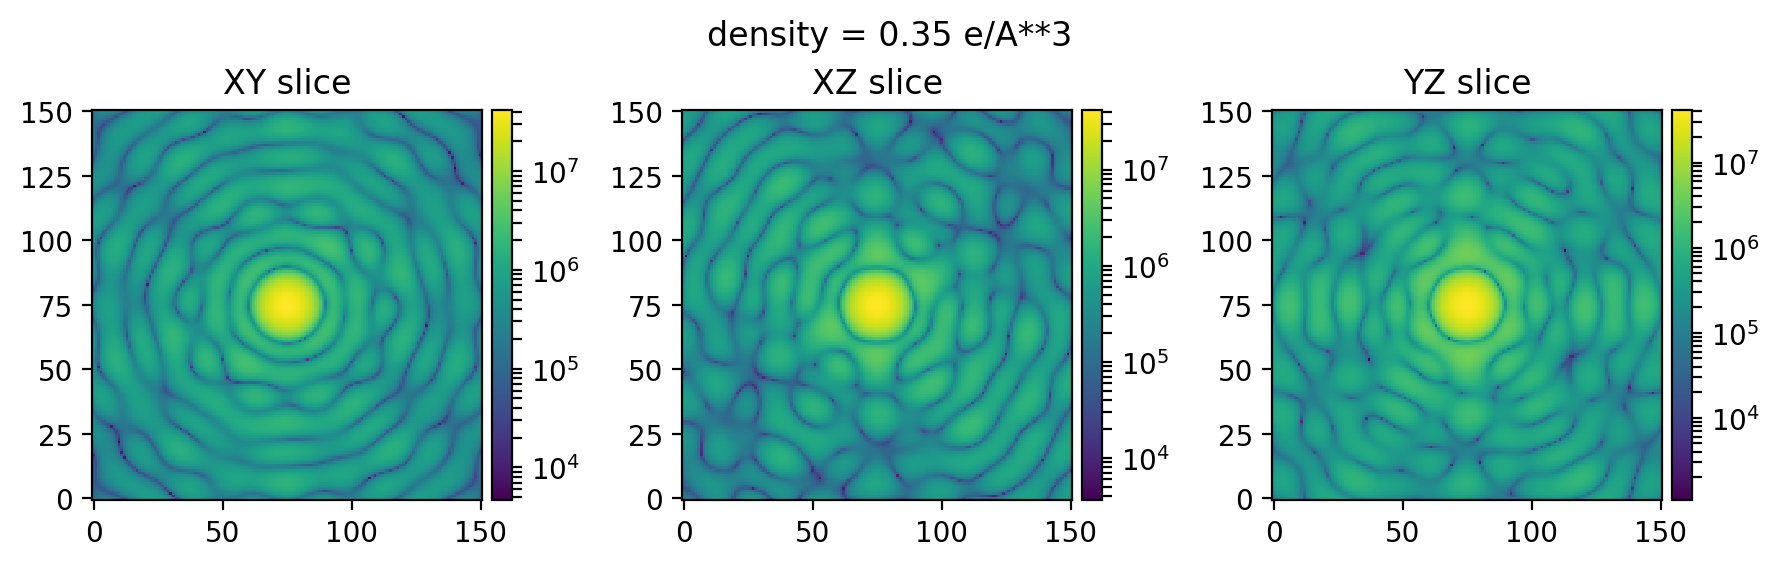

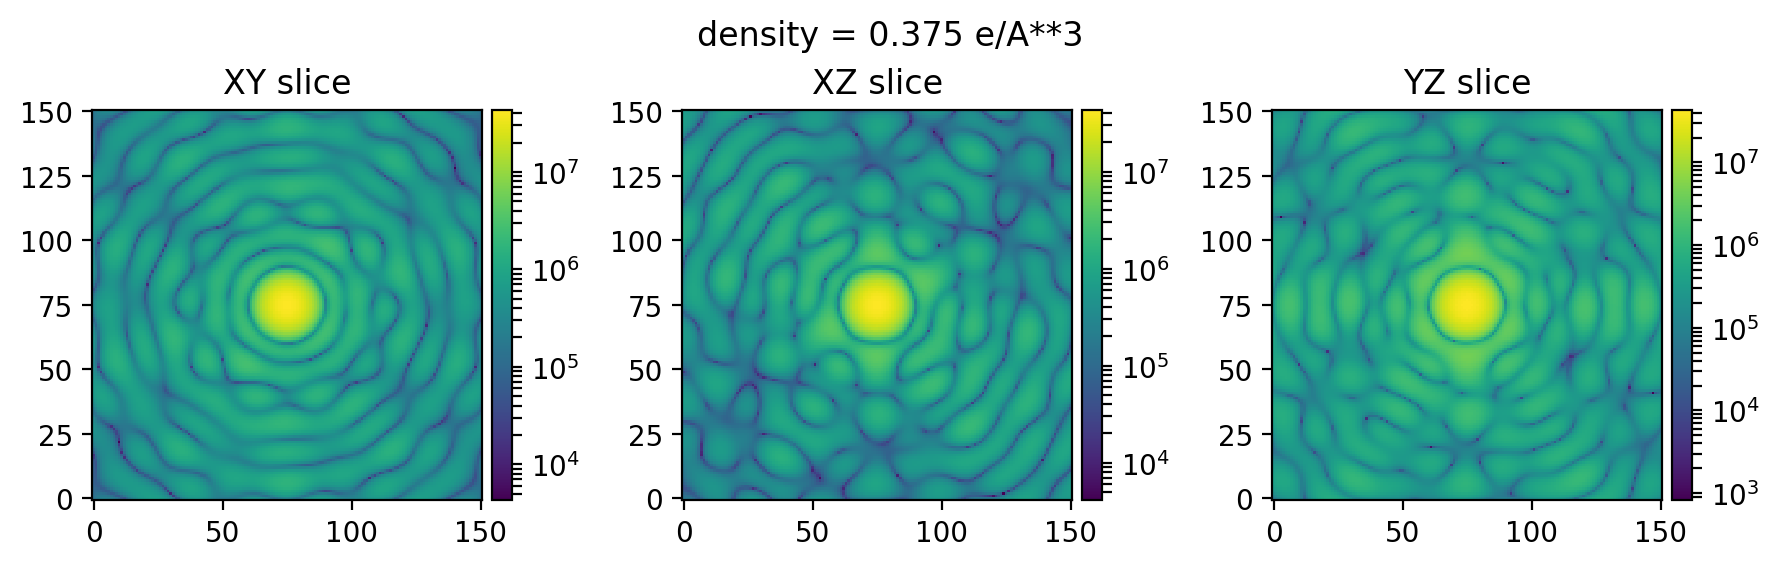

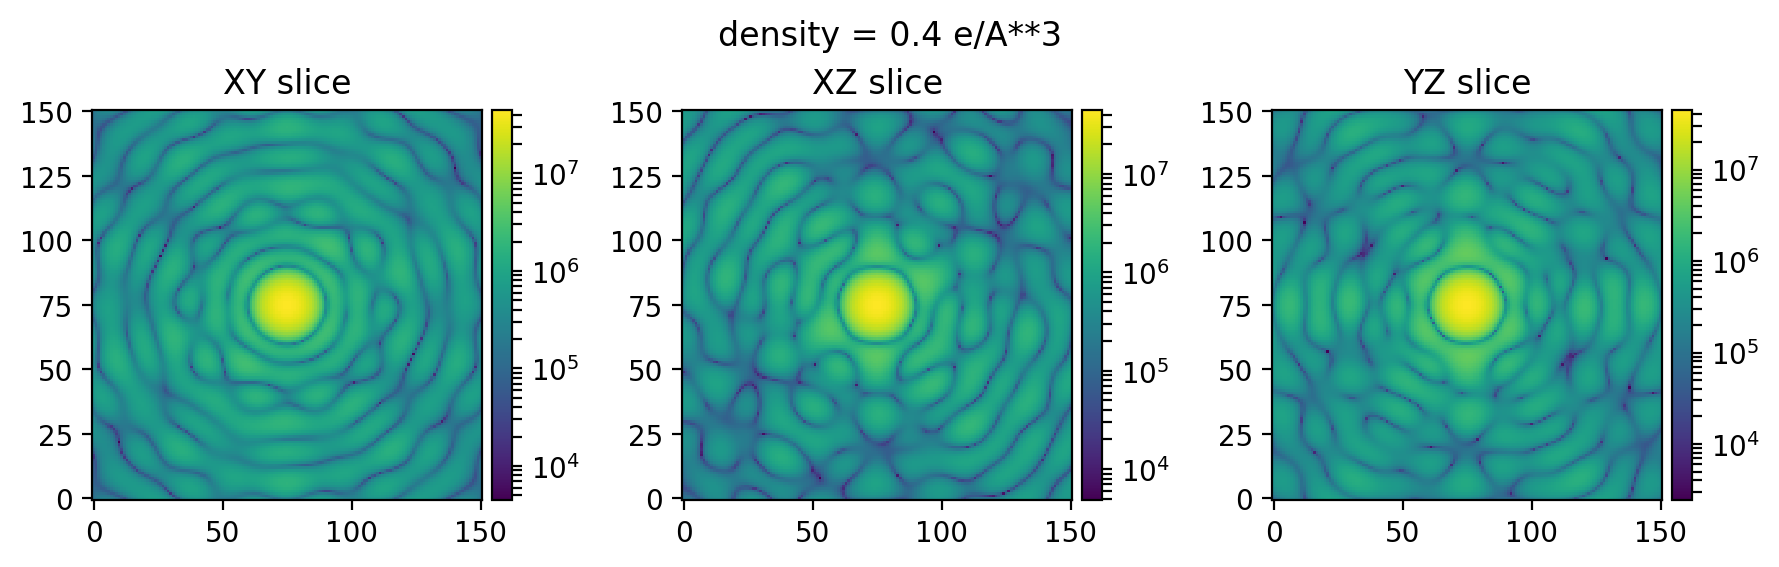

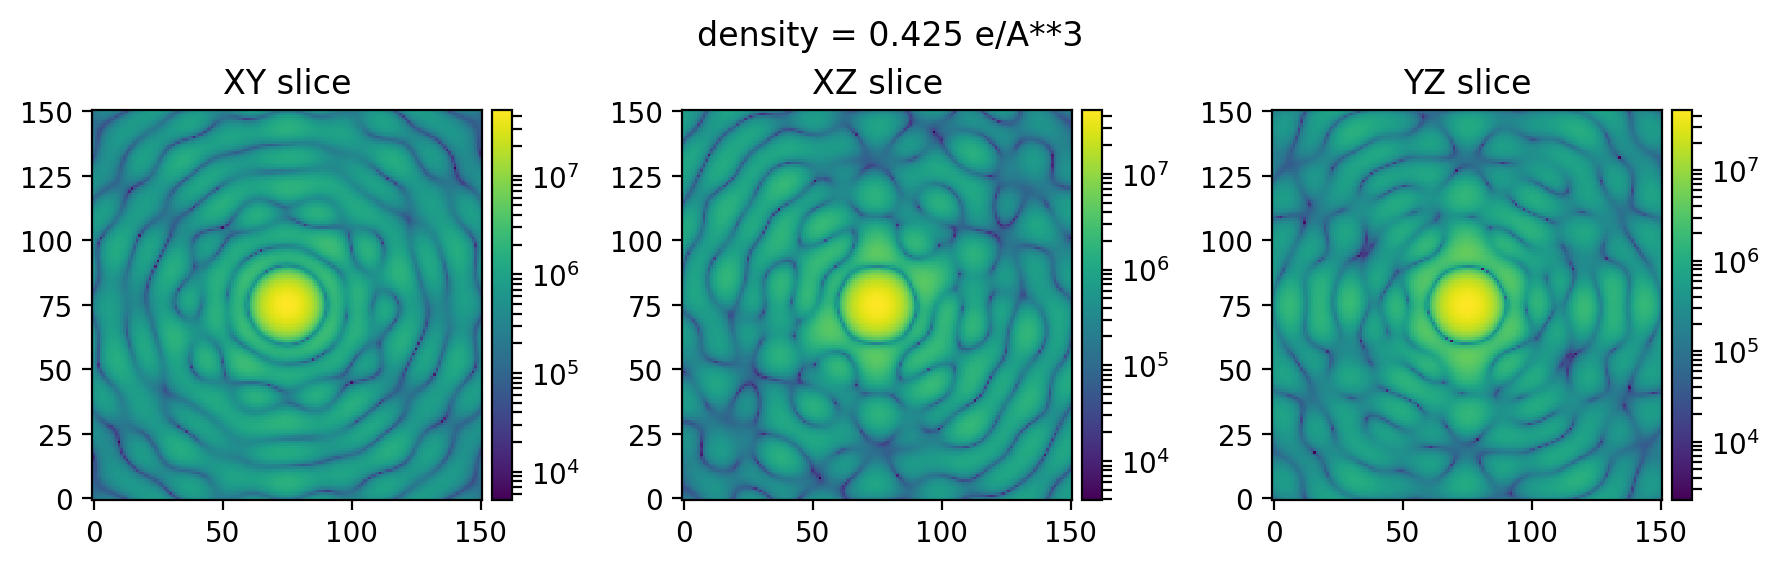

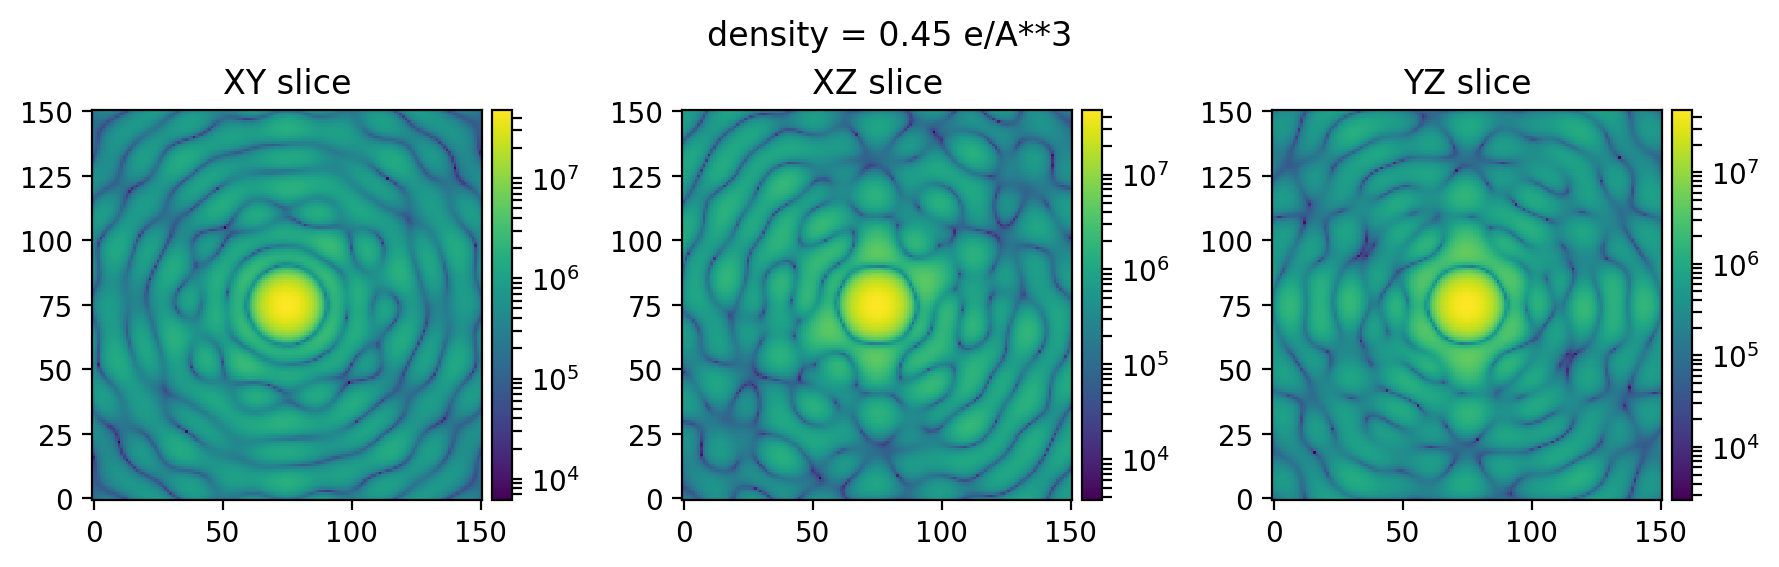

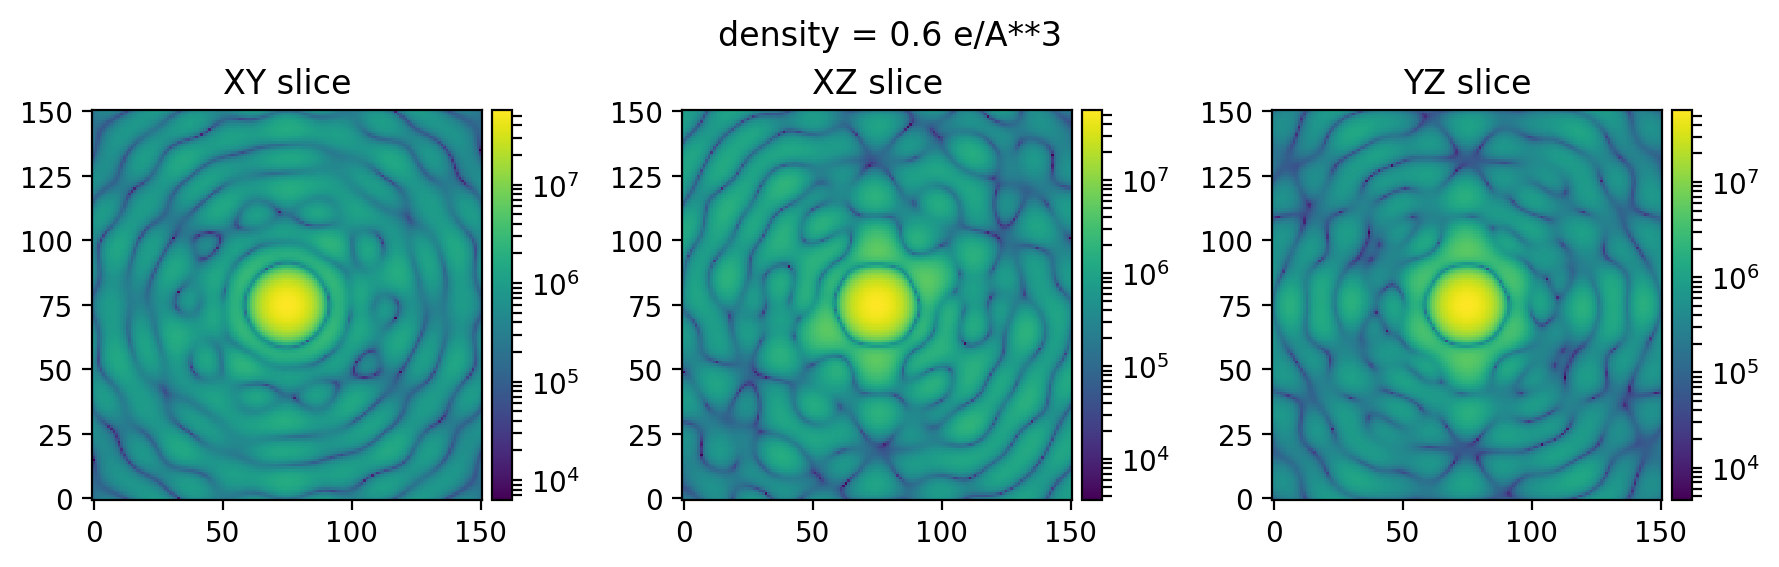

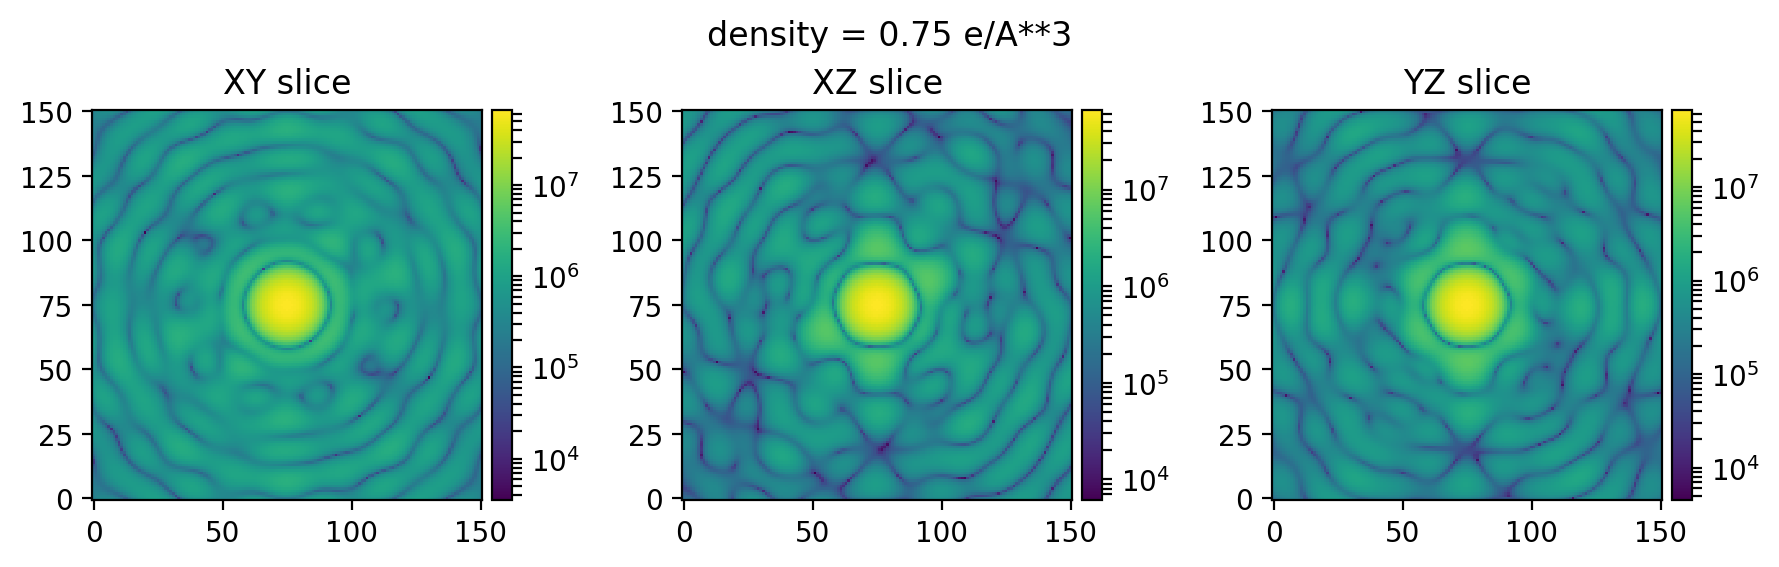

In [263]:
print("Absolute value of the wavefunction scattered by the virus for increasing values of electron density in its core")
for density in density_list:
    filepath=SKOPI_DATASETS_DIR+density+"/saveHDF5_parallel.h5"
    title="density = {} e/A**3".format(density)
    plot_central_slices(filepath, title)

Absolute value of the wavefunction scattered by the virus for decreaseing values of the core mesh voxel size


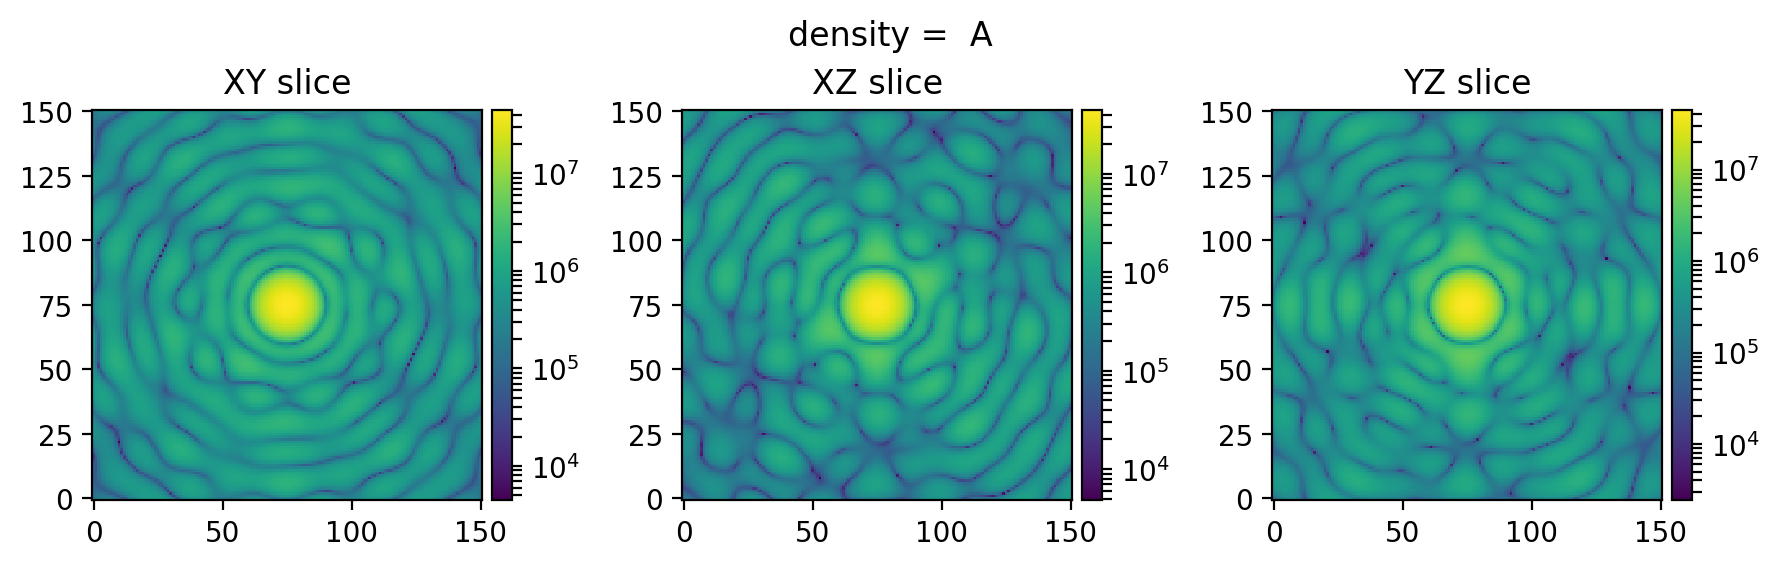

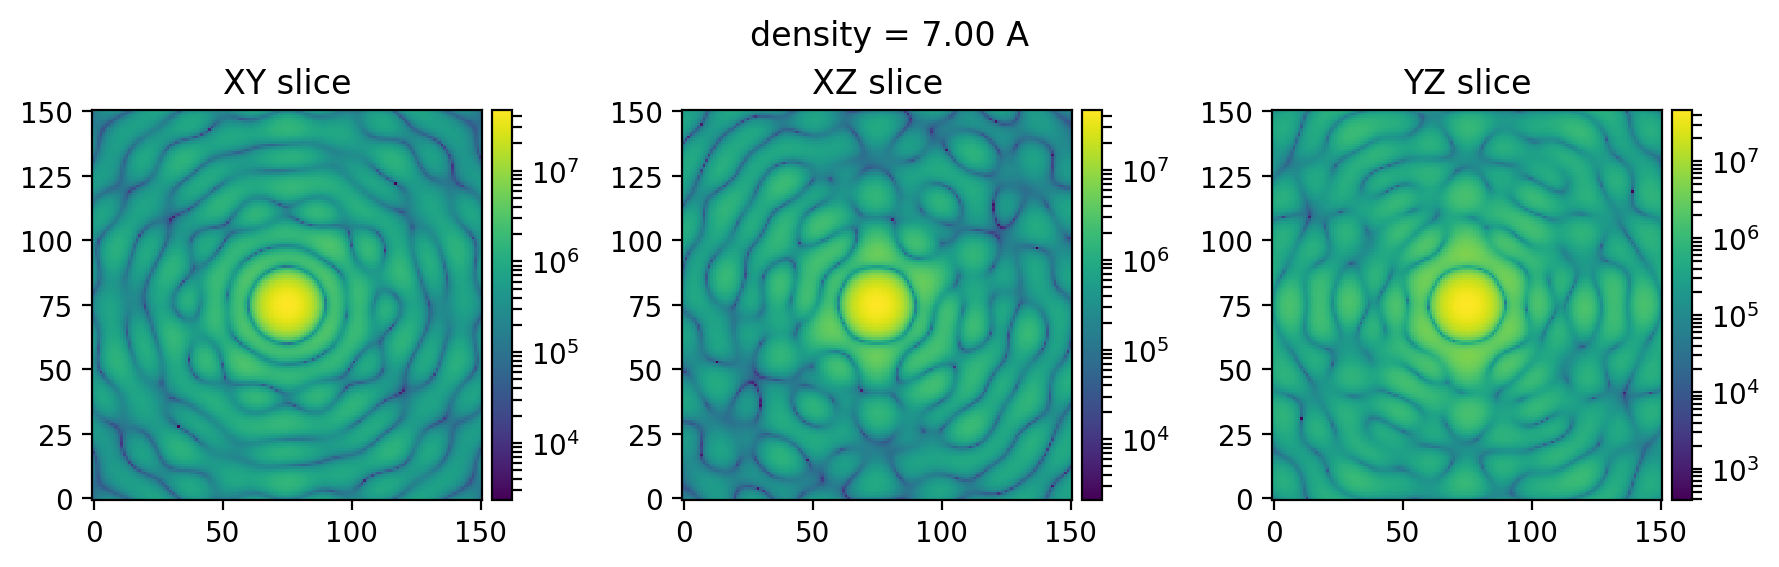

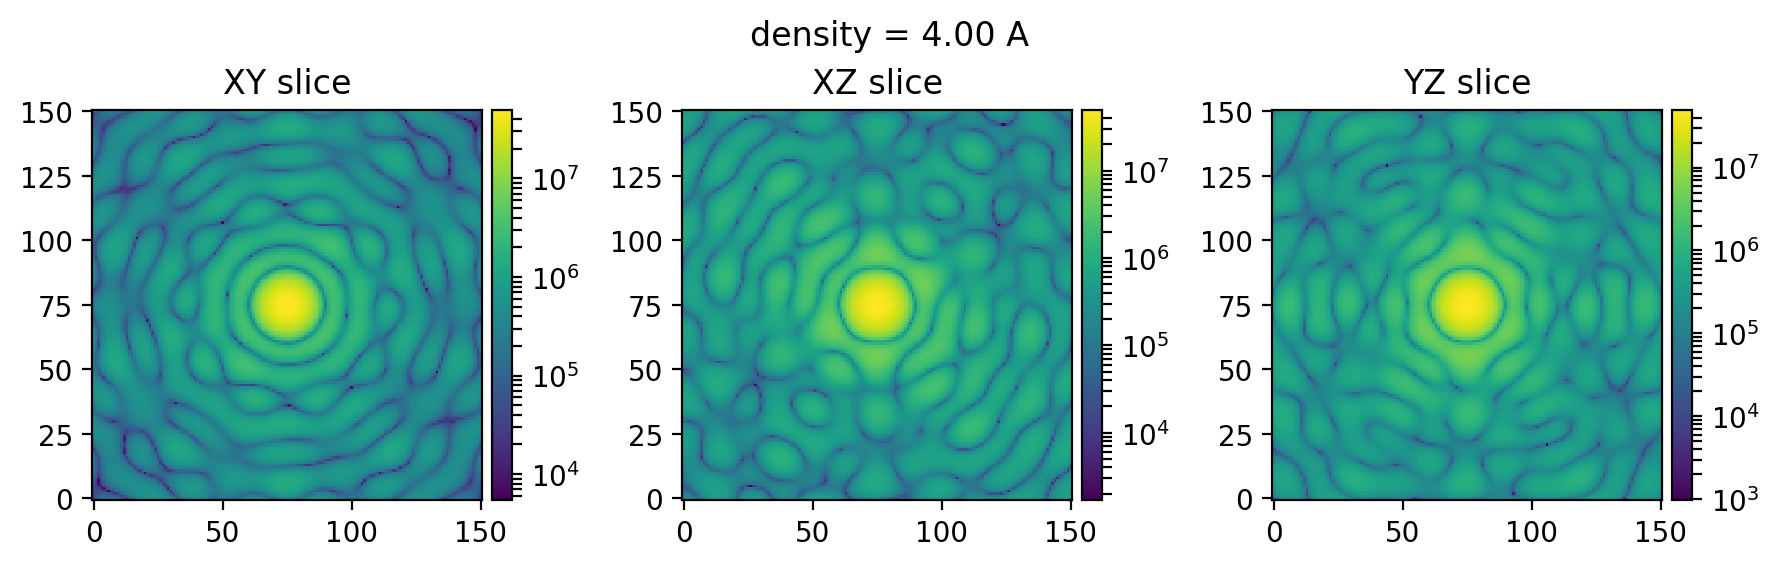

In [30]:
print("Absolute value of the wavefunction scattered by the virus for decreaseing values of the core mesh voxel size")
density='0.4/'
meshsize_list=['', '7.00', '4.00']
for meshsize in meshsize_list:
    filepath=SKOPI_DATASETS_DIR+density+meshsize+"/saveHDF5_parallel.h5"
    title="density = {} A".format(meshsize)
    plot_central_slices(filepath, title)

As explained in `pr772/README.md`, the datasets were averaged and a SAXS profile was generated for each. We display them below:

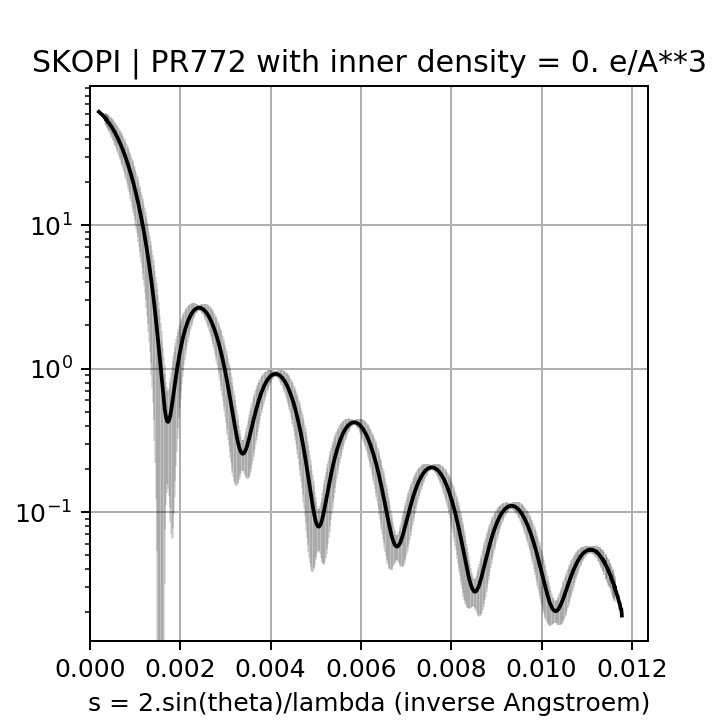

In [137]:
Image(filename="/cds/home/f/fpoitevi/Toolkit/skopi/examples/notebooks/figures/pr772/skopi/6q5u_0.-saxs.png")

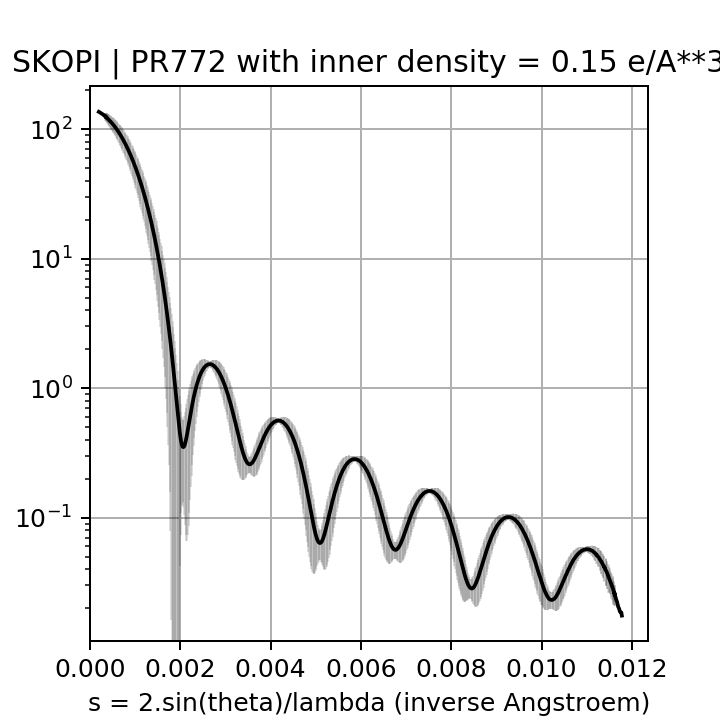

In [142]:
Image(filename="/cds/home/f/fpoitevi/Toolkit/skopi/examples/notebooks/figures/pr772/skopi/6q5u_0.15-saxs.png")

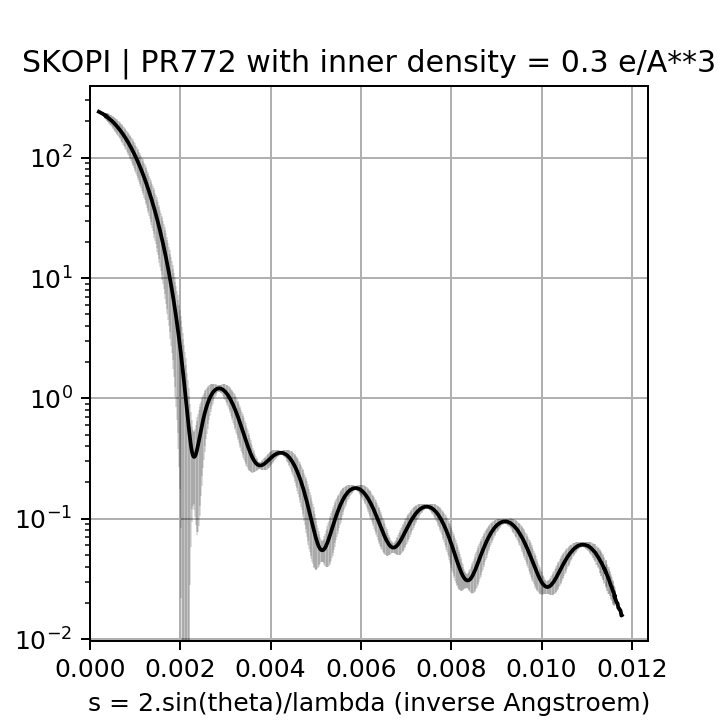

In [144]:
Image(filename="/cds/home/f/fpoitevi/Toolkit/skopi/examples/notebooks/figures/pr772/skopi/6q5u_0.3-saxs.png")

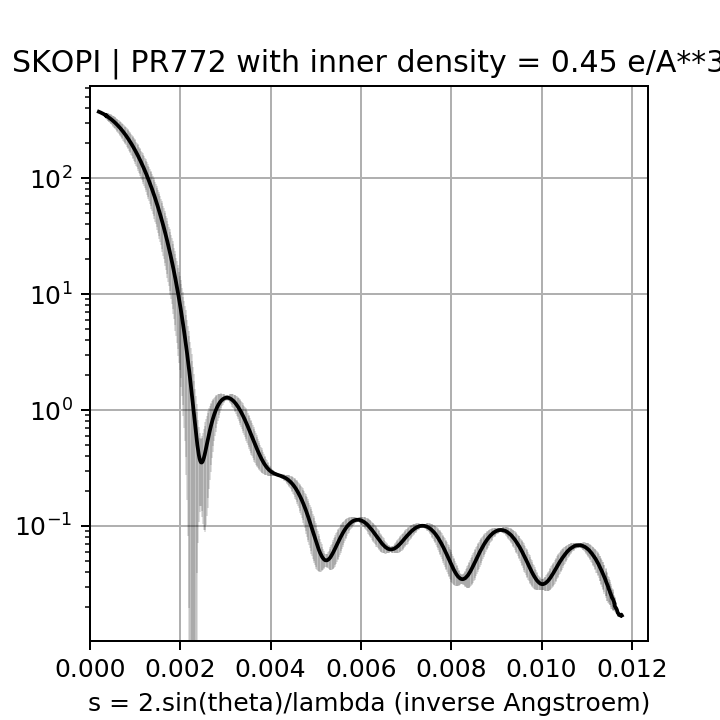

In [145]:
Image(filename="/cds/home/f/fpoitevi/Toolkit/skopi/examples/notebooks/figures/pr772/skopi/6q5u_0.45-saxs.png")

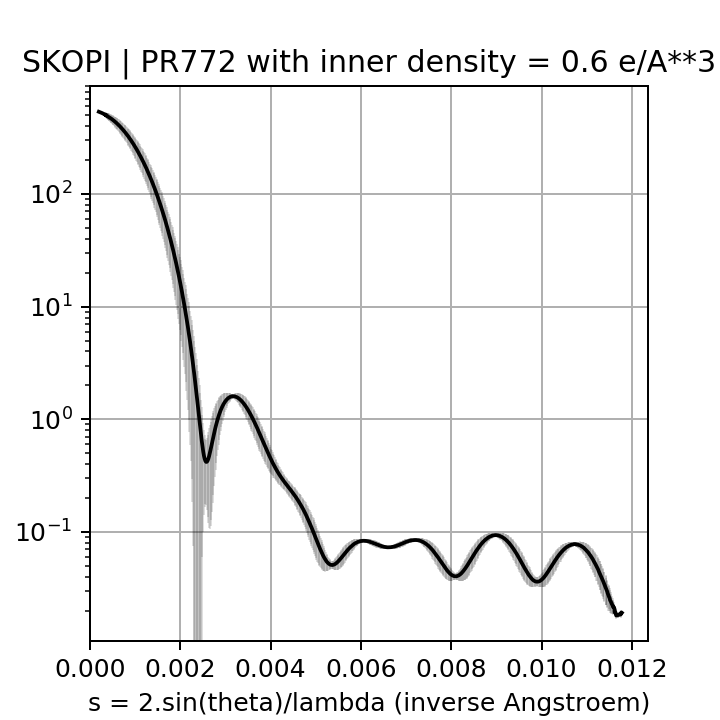

In [160]:
Image(filename="/cds/home/f/fpoitevi/Toolkit/skopi/examples/notebooks/figures/pr772/skopi/6q5u_0.6-saxs.png")

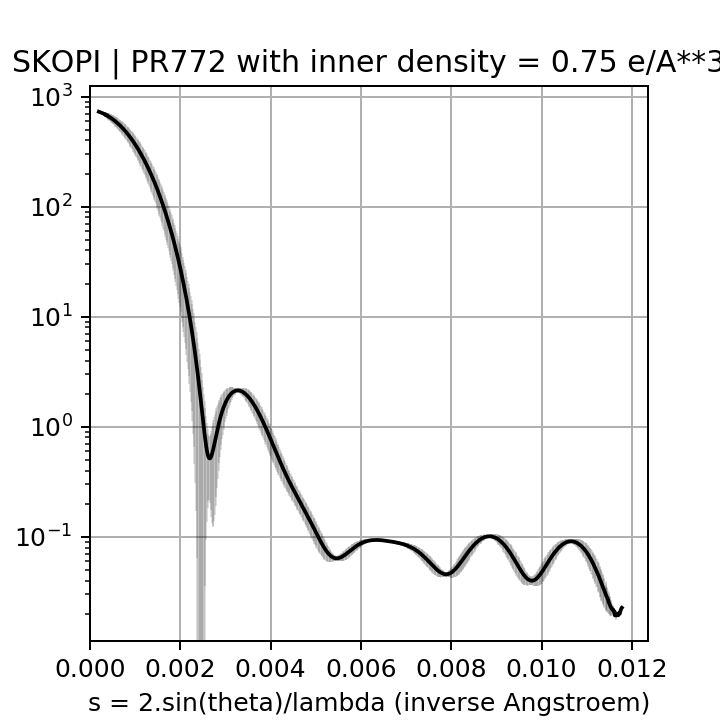

In [161]:
Image(filename="/cds/home/f/fpoitevi/Toolkit/skopi/examples/notebooks/figures/pr772/skopi/6q5u_0.75-saxs.png")

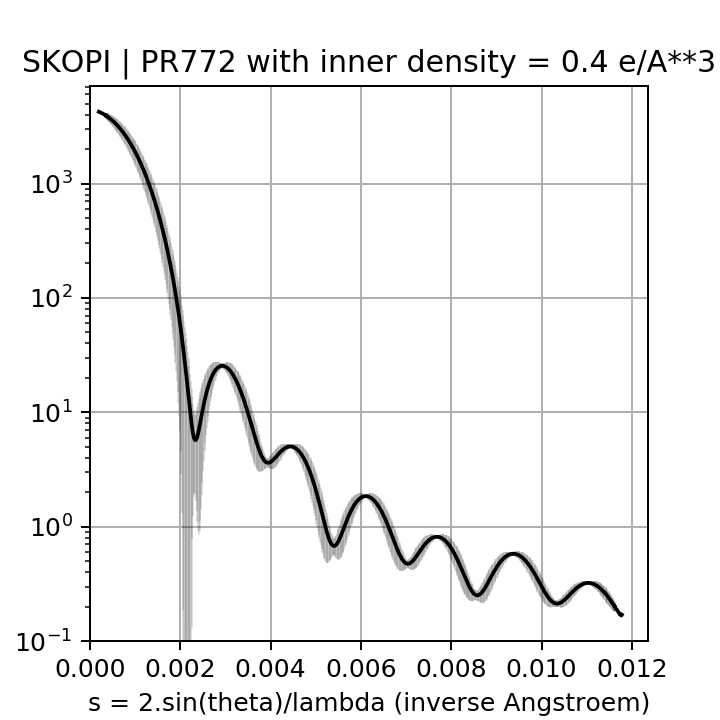

In [119]:
Image(filename="/cds/home/f/fpoitevi/Toolkit/skopi/examples/notebooks/figures/pr772/skopi/6q5u_0.4-2.00-saxs.png")

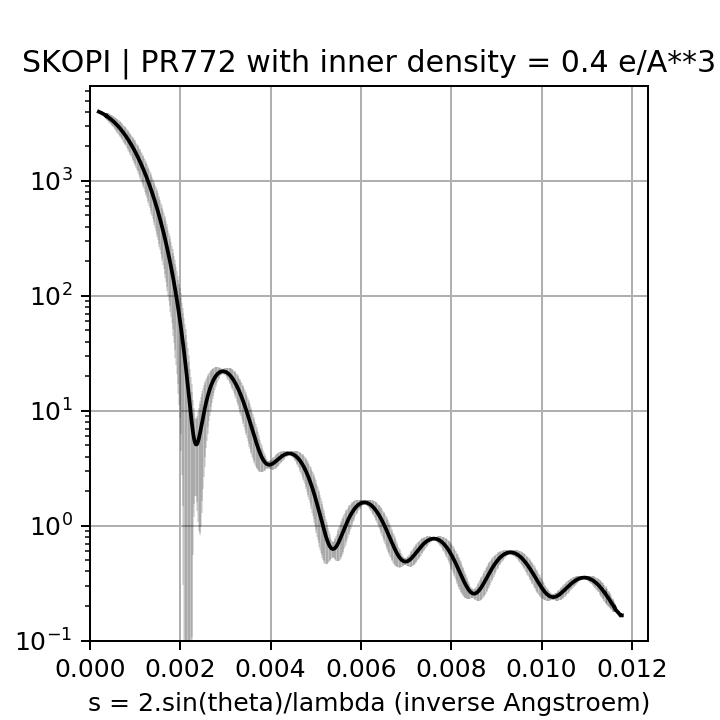

In [31]:
Image(filename="/cds/home/f/fpoitevi/Toolkit/skopi/examples/notebooks/figures/pr772/skopi/6q5u_0.4-4.00-saxs.png")

## Bonus
If you are curious to see what the average diffraction patterns look like, etc. then see below

/cds/sw/ds/ana/conda1/inst/envs/ana-4.0.20/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide


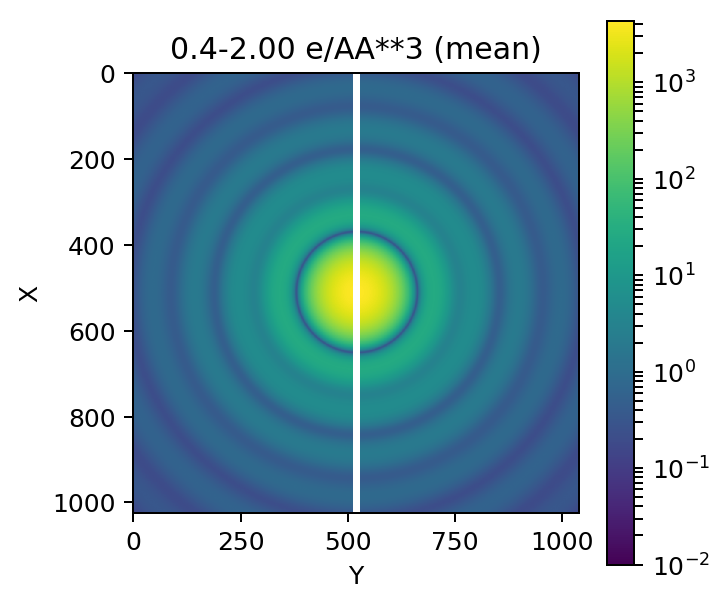

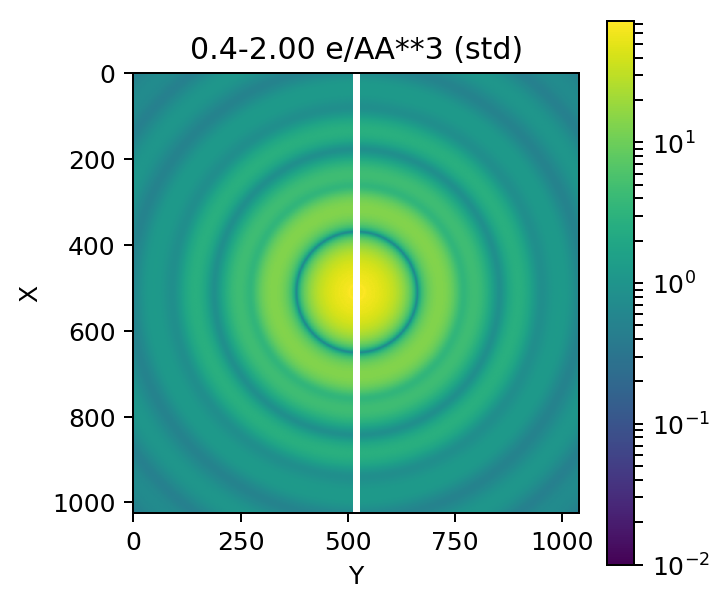

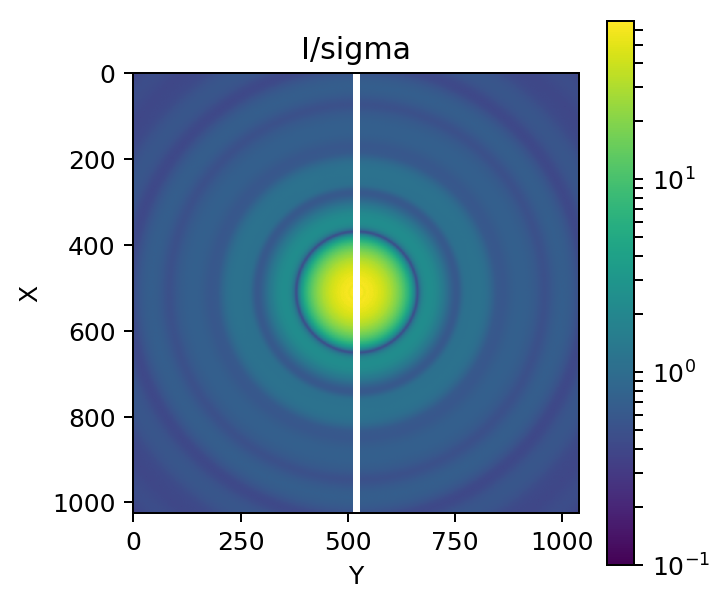

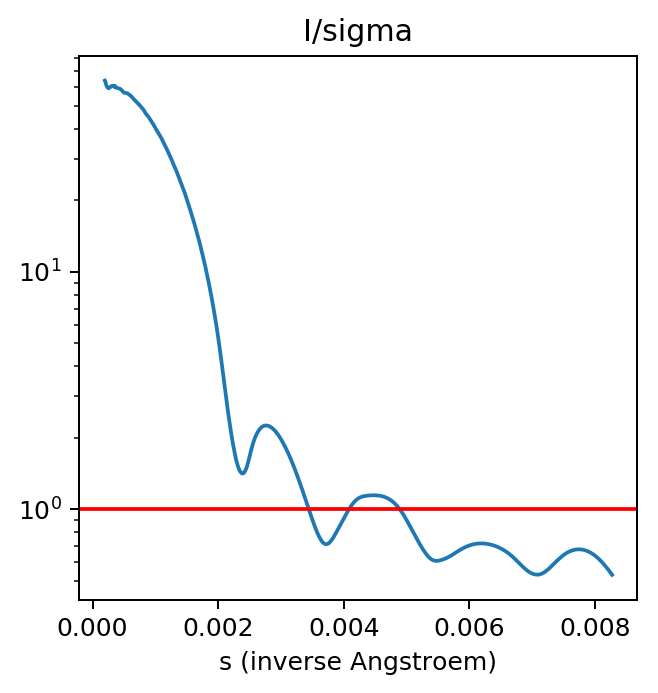

In [120]:
density='0.4-2.00'
#
filepath_mean=FIGURE_DIR+"skopi/6q5u_{}-mean.npy".format(density)
filepath_std=FIGURE_DIR+"skopi/6q5u_{}std.npy".format(density)
try:
    mean_image = np.load(filepath_mean)
    assembled_mean_image = assemble_image(mean_image)
    cute_plot(assembled_mean_image, vmin=1e-2, title='{} e/AA**3 (mean)'.format(density))
    std_image = np.load(filepath_std)
    assembled_std_image = assemble_image(std_image)
    cute_plot(assembled_std_image, vmin=1e-2, title='{} e/AA**3 (std)'.format(density))
    ratio = assembled_mean_image/assembled_std_image
    cute_plot(ratio, vmin=1e-1, title='I/sigma')
    #
    center = center_from_displacement(assembled_mean_image, ix=0, iy=0)
    experimentName, detInfo = config_info()
    q_image = build_q_image(experimentName, 190)
    detector_mask = build_detector_mask(experimentName, 190)
    profile_q = radial_profile(q_image, center, mask=detector_mask, threshold=0)
    #profile_mean = radial_profile(image, center, mask=detector_mask, threshold=0)
    profile_ratio = radial_profile(ratio, center, mask=detector_mask, threshold=0)
    fig = plt.figure(figsize=(4,4),dpi=180)
    plt.title('I/sigma')
    plt.plot(profile_q[:512], profile_ratio[:512])
    plt.xlabel('s (inverse Angstroem)')
    plt.axhline(y=1, color='r', linestyle='-')
    plt.yscale('log')
    plt.show()
except:
    print("file not found: {}".format(filepath_mean))

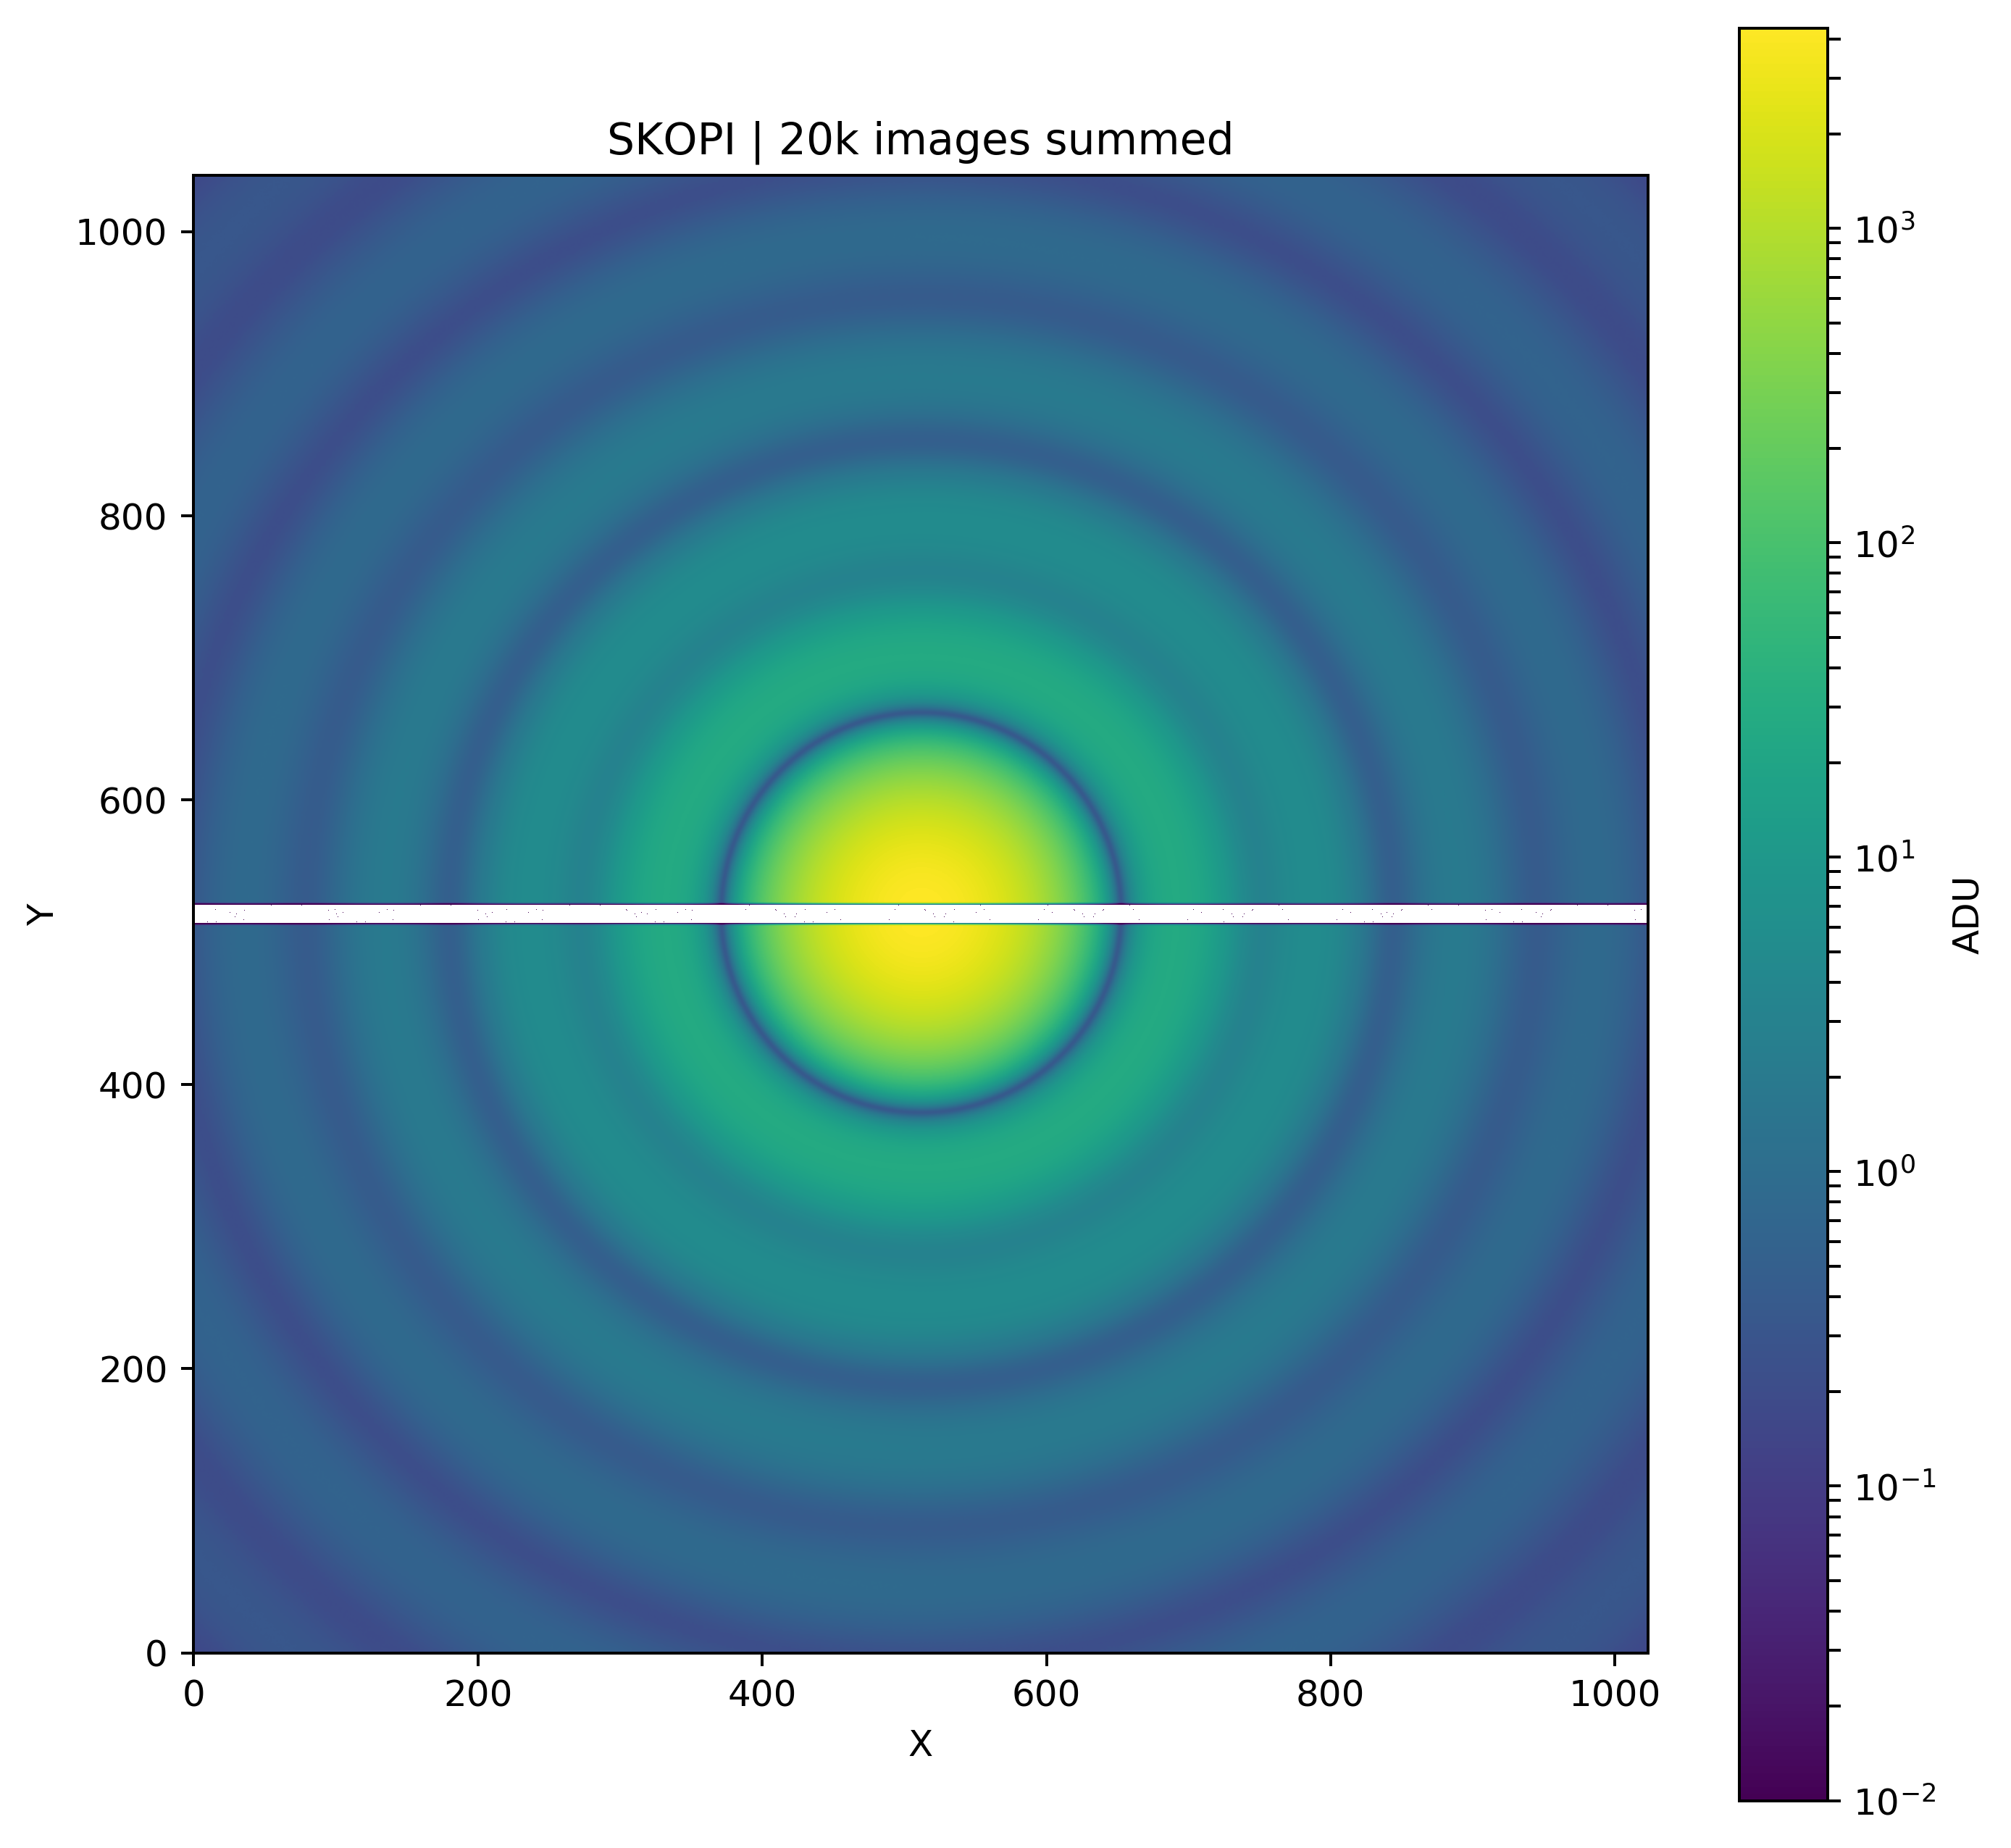

In [127]:
density='0.4-2.00'
filepath_mean=FIGURE_DIR+"skopi/6q5u_{}-mean.npy".format(density)
mean_image = np.load(filepath_mean)
assembled_mean_image = assemble_image(mean_image)
fig = plt.figure(figsize=(9,9),dpi=360)
plt.title('SKOPI | 20k images summed')
#img = np.where(img_mean<1e-6, 1e-6, img_mean)
plt.imshow(assembled_mean_image.T, origin='lower', norm=LogNorm(vmin=1e-2), interpolation='gaussian')
plt.colorbar(label='ADU')
plt.xlabel('X')
plt.ylabel('Y')
#plt.show()
plt.savefig("simulated_mean.png")

# Compare with experiment

(work in progress)

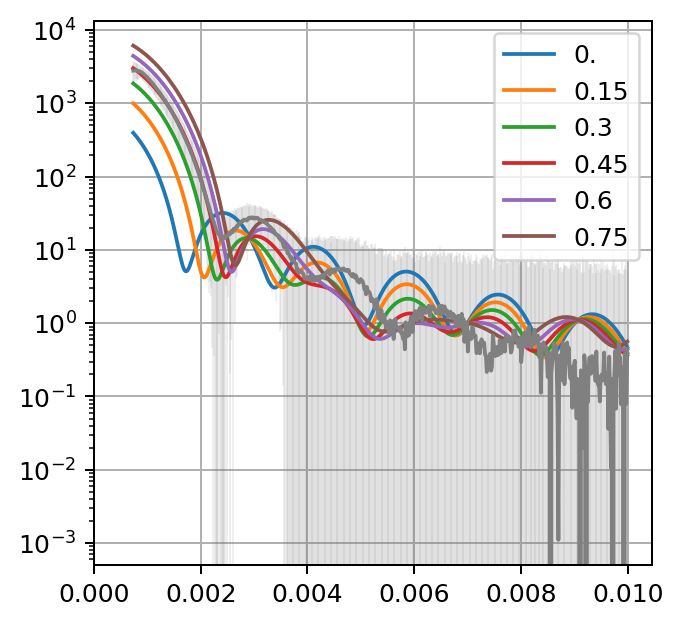

In [287]:
scale=1.2e1
fig = plt.figure(figsize=(4,4),dpi=180)

exp_profile = np.load('{}{}.npy'.format(FIGURE_DIR,'team_LCLS_saxs'))
exp_profile_q    = exp_profile[:,0]
exp_profile_mean = exp_profile[:,1]
exp_profile_std  = exp_profile[:,2]
exp_profile_mask = exp_profile[:,3].astype('bool')
plt.errorbar(exp_profile_q[exp_profile_mask], 
             exp_profile_mean[exp_profile_mask], 
             yerr=exp_profile_std[exp_profile_mask], 
             elinewidth=0.1, color='gray')

for density in ['0.', '0.15', '0.3', '0.45', '0.6', '0.75']:
    sim_profile = np.load('{}{}.npy'.format(FIGURE_DIR+'skopi/','6q5u_'+str(density)+'-saxs'))
    sim_profile_q    = sim_profile[:,0]
    sim_profile_mean = sim_profile[:,1]
    sim_profile_std  = sim_profile[:,2]
    sim_profile_mask = sim_profile[:,3].astype('bool')
    plt.plot(sim_profile_q[exp_profile_mask], 
             scale*sim_profile_mean[exp_profile_mask], 
             label=density)

plt.xlim(0)
plt.legend()
plt.grid()
plt.yscale('log')

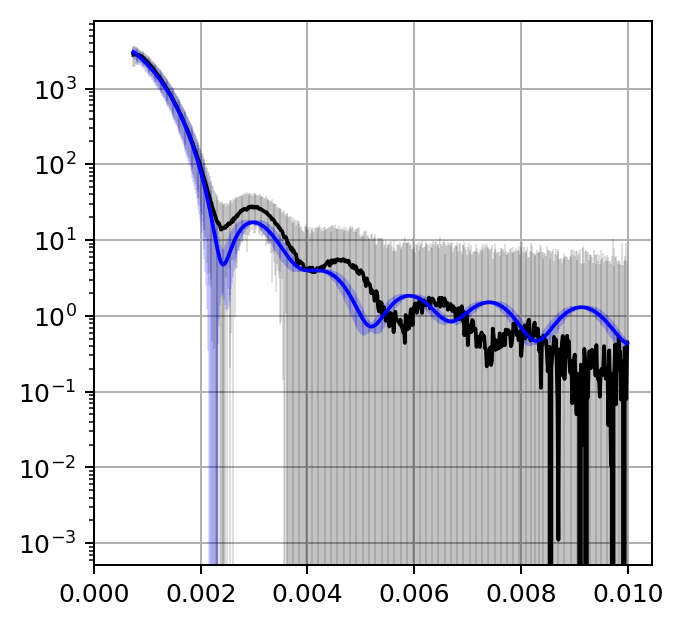

In [324]:
density='0.4'
scale=1.4e1

try:
    exp_profile = np.load('{}{}.npy'.format(FIGURE_DIR,'team_LCLS_saxs'))
    sim_profile = np.load('{}{}.npy'.format(FIGURE_DIR+'skopi/','6q5u_'+str(density)+'-saxs'))
except:
    print('please check, something went wrong')

exp_profile_q    = exp_profile[:,0]
exp_profile_mean = exp_profile[:,1]
exp_profile_std  = exp_profile[:,2]
exp_profile_mask = exp_profile[:,3].astype('bool')
sim_profile_q    = sim_profile[:,0]
sim_profile_mean = sim_profile[:,1]
sim_profile_std  = sim_profile[:,2]
sim_profile_mask = sim_profile[:,3].astype('bool')

#
fig = plt.figure(figsize=(4,4),dpi=180)
plt.errorbar(exp_profile_q[exp_profile_mask], 
             exp_profile_mean[exp_profile_mask], 
             yerr=exp_profile_std[exp_profile_mask], 
             elinewidth=0.1, color='black')
plt.errorbar(sim_profile_q[exp_profile_mask], 
             scale*sim_profile_mean[exp_profile_mask], 
             yerr=scale*sim_profile_std[exp_profile_mask], 
             elinewidth=0.1, color='blue')
plt.xlim(0)
plt.grid()
plt.yscale('log')

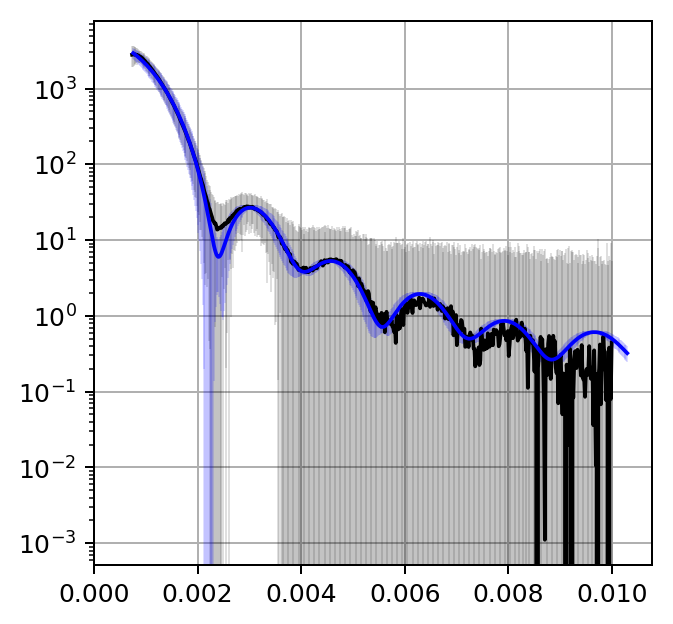

In [126]:
density='0.4-2.00'

I_scale=1.05
q_scale=1.03

try:
    exp_profile = np.load('{}{}.npy'.format(FIGURE_DIR,'team_LCLS_saxs'))
    sim_profile = np.load('{}{}.npy'.format(FIGURE_DIR+'skopi/','6q5u_'+str(density)+'-saxs'))
except:
    print('please check, something went wrong')

exp_profile_q    = exp_profile[:,0]
exp_profile_mean = exp_profile[:,1]
exp_profile_std  = exp_profile[:,2]
exp_profile_mask = exp_profile[:,3].astype('bool')
sim_profile_q    = sim_profile[:,0]
sim_profile_mean = sim_profile[:,1]
sim_profile_std  = sim_profile[:,2]
sim_profile_mask = sim_profile[:,3].astype('bool')

#
fig = plt.figure(figsize=(4,4),dpi=180)
plt.errorbar(exp_profile_q[exp_profile_mask], 
             exp_profile_mean[exp_profile_mask], 
             yerr=exp_profile_std[exp_profile_mask],
             elinewidth=0.1, color='black')
plt.errorbar(q_scale*sim_profile_q[exp_profile_mask], 
             I_scale*sim_profile_mean[exp_profile_mask], 
             yerr=I_scale*sim_profile_std[exp_profile_mask], 
             elinewidth=0.1, color='blue')
plt.xlim(0)
plt.grid()
plt.yscale('log')
plt.savefig('saxs_good_fit.png')

(0, 10)

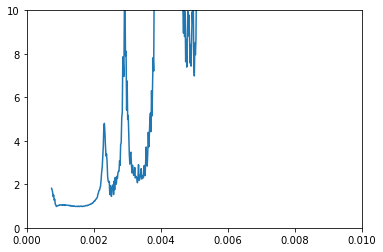

In [139]:
plt.plot(exp_profile_q[exp_profile_mask], exp_profile_std[exp_profile_mask]/(I_scale*sim_profile_std[exp_profile_mask]))
plt.xlim((0,0.01))
plt.ylim((0,10))

In [109]:
h = 2*np.pi*6.582119 * 1e-16 #eV.s
c = 2.99792 * 1e8  # m/s
lam = 7.963 * 1e-10 #m 
E = h*c/lam
print(E)

1557.00110878


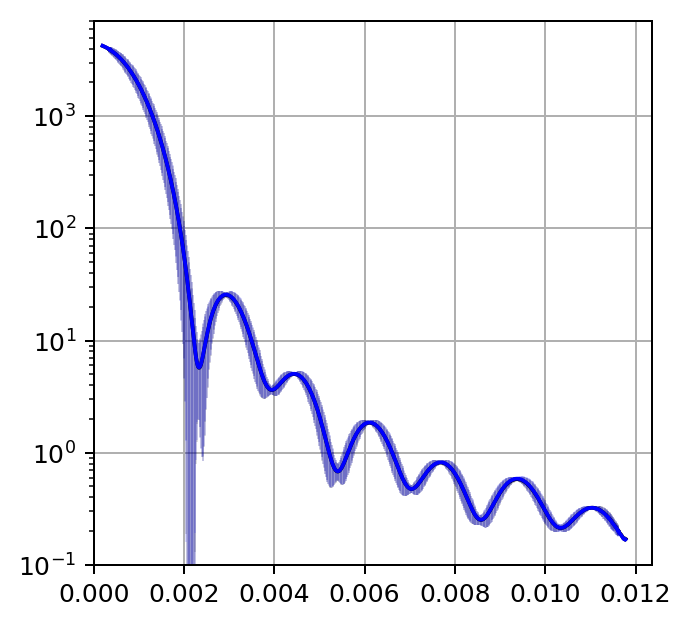

In [113]:
density1='0.4-2.00'
density2='0.4-3.00'
scale=1

try:
    exp_profile = np.load('{}{}.npy'.format(FIGURE_DIR+'skopi/','6q5u_'+str(density1)+'-saxs'))
    sim_profile = np.load('{}{}.npy'.format(FIGURE_DIR+'skopi/','6q5u_'+str(density2)+'-saxs'))
except:
    print('please check, something went wrong')

exp_profile_q    = exp_profile[:,0]
exp_profile_mean = exp_profile[:,1]
exp_profile_std  = exp_profile[:,2]
exp_profile_mask = exp_profile[:,3].astype('bool')
sim_profile_q    = sim_profile[:,0]
sim_profile_mean = sim_profile[:,1]
sim_profile_std  = sim_profile[:,2]
sim_profile_mask = sim_profile[:,3].astype('bool')

#
fig = plt.figure(figsize=(4,4),dpi=180)
plt.errorbar(exp_profile_q[exp_profile_mask], 
             exp_profile_mean[exp_profile_mask], 
             yerr=exp_profile_std[exp_profile_mask], 
             elinewidth=0.1, color='black')
plt.errorbar(sim_profile_q[exp_profile_mask], 
             scale*sim_profile_mean[exp_profile_mask], 
             yerr=scale*sim_profile_std[exp_profile_mask], 
             elinewidth=0.1, color='blue')
plt.xlim(0)
plt.grid()
plt.yscale('log')

/cds/sw/ds/ana/conda1/inst/envs/ana-4.0.20/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


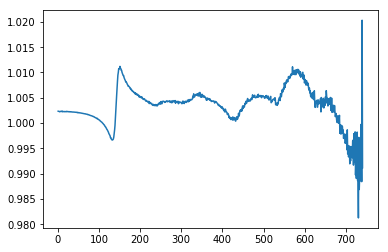

In [117]:
plt.plot(sim_profile_mean/exp_profile_mean)

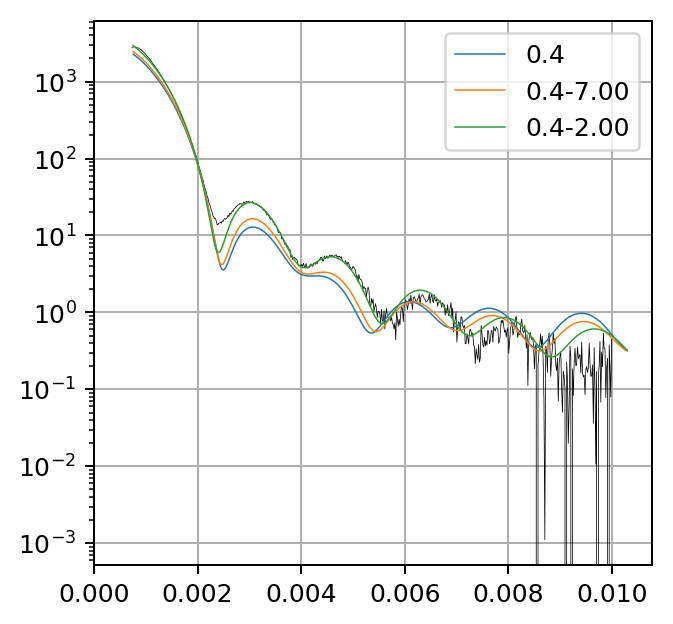

In [118]:
fig = plt.figure(figsize=(4,4),dpi=180)

exp_profile = np.load('{}{}.npy'.format(FIGURE_DIR,'team_LCLS_saxs'))
exp_profile_q    = exp_profile[:,0]
exp_profile_mean = exp_profile[:,1]
exp_profile_std  = exp_profile[:,2]
exp_profile_mask = exp_profile[:,3].astype('bool')
plt.plot(exp_profile_q[exp_profile_mask], 
             exp_profile_mean[exp_profile_mask], color='black', linewidth=0.3)

q_scale=1.03
scale = np.array([1.05e1, 1.05, 1.05])
i=0
for density in ['0.4', '0.4-7.00', '0.4-2.00']:
    sim_profile = np.load('{}{}.npy'.format(FIGURE_DIR+'skopi/','6q5u_'+str(density)+'-saxs'))
    sim_profile_q    = sim_profile[:,0]
    sim_profile_mean = sim_profile[:,1]
    sim_profile_std  = sim_profile[:,2]
    sim_profile_mask = sim_profile[:,3].astype('bool')
    plt.plot(q_scale*sim_profile_q[exp_profile_mask], 
             scale[i]*sim_profile_mean[exp_profile_mask], linewidth=0.6, 
             label=density)
    i+=1
plt.xlim(0)
plt.legend()
plt.grid()
plt.yscale('log')

In [36]:
playground = h5.File(SKOPI_DATASETS_DIR+"0.4/4.00/saveHDF5_parallel.h5", 'r')
playground['photons']

<HDF5 dataset "photons": shape (20000, 4, 512, 512), type "<f4">

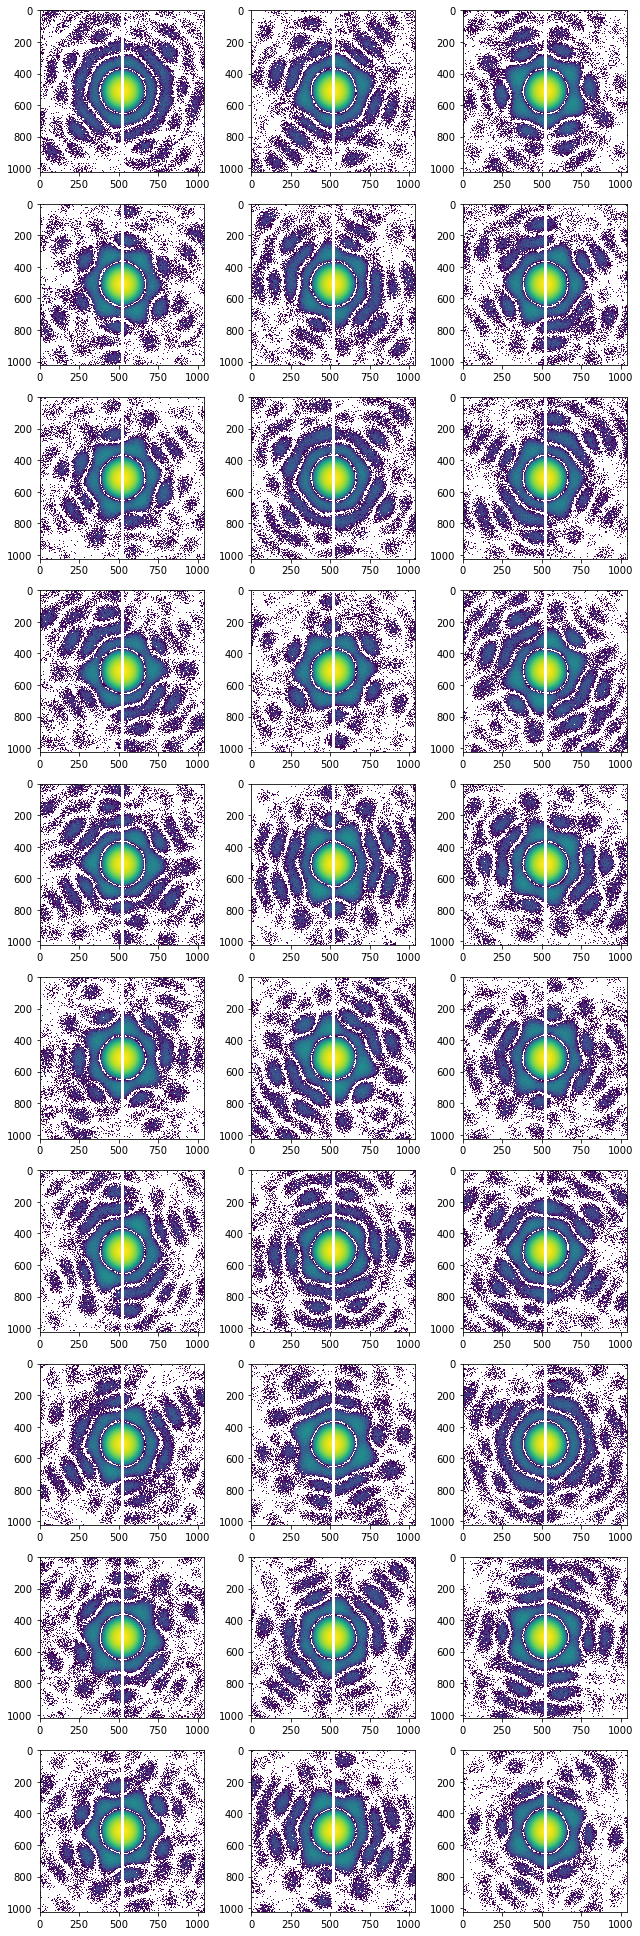

In [40]:
nrows=10
ncols=3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(9, 9*(nrows//ncols)))
for i in range(nrows):
    for j in range(ncols):
        image = assemble_image(playground['photons'][i*nrows+j])
        #title = str(spi_data['orientations'][i*nrows+j])
        #axs[i,j].set_title(title)
        axs[i,j].imshow(image, norm=LogNorm(), interpolation='none')
plt.tight_layout()

TODO:
- check reciprocal space (effect of uncertainty on energy?)
- source of the weirdly regular error in simulated data?
- add jitter